In [1]:
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd


Mounted at /content/drive


In [2]:
raw_df = pd.read_csv('/content/drive/MyDrive/data/bert/BBC News Train.csv')

In [3]:
raw_df.head(4)

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech


In [15]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [4]:
raw_df['Text'].str.len().mean()


2233.461744966443

In [19]:
raw_df['Text'].str.len()

0       1866
1       2016
2       3104
3       3618
4       2190
        ... 
1485    1266
1486    3111
1487    1370
1488    3242
1489    1723
Name: Text, Length: 1490, dtype: int64

In [8]:
!pip install transformers torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.1 MB/s 
     |████████████████████████████████| 101 kB 13.9 MB/s 
     |████████████████████████████████| 596 kB 71.7 MB/s 
     |████████████████████████████████| 6.6 MB 49.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [6]:
from tqdm.notebook import tqdm
tqdm.pandas()


In [5]:
import pickle
import time
import string
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd



from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns



In [55]:
import torch
from torchtext import data
import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification
import torch.optim as optim

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [11]:

RANDOM_STATE = 1

In [10]:
MAX_SEQ_LEN = 200

def preprocess_text(text):
  text = text.split()
  text = ' '.join(text[:MAX_SEQ_LEN])
  text = text.lower()
  return text

In [12]:
raw_df['Text1'] = raw_df['Text'].apply(lambda x: preprocess_text(x))


In [13]:
raw_df

,ArticleId,Text,Category,Text1
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex-boss launches defence lawyers defe...
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in $168m payout eighteen former e...
...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,double eviction from big brother model caprice...
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,dj double act revamp chart show dj duo jk and ...
1487,1590,weak dollar hits reuters revenues at media gro...,business,weak dollar hits reuters revenues at media gro...
1488,1587,apple ipod family expands market apple has exp...,tech,apple ipod family expands market apple has exp...


In [14]:
raw_df['Text1'].str.len().mean()


1129.6966442953021

In [19]:
raw_df['Text1'].str.split().str.len().mean()


196.47181208053692

In [15]:
raw_df['Text1']

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens in ...
3       lifestyle governs mobile choice faster better ...
4       enron bosses in $168m payout eighteen former e...
                              ...                        
1485    double eviction from big brother model caprice...
1486    dj double act revamp chart show dj duo jk and ...
1487    weak dollar hits reuters revenues at media gro...
1488    apple ipod family expands market apple has exp...
1489    santy worm makes unwelcome visit thousands of ...
Name: Text1, Length: 1490, dtype: object

In [16]:
raw_df['Text1'][0]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness. cynthia cooper worldcom s ex-head of internal accounting alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy. prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper who now runs her own consulting business told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a green light to the procedures and practices used by worldcom. mr ebber s lawy

In [17]:
len(raw_df['Text1'][0])

1241

In [18]:
raw_df['Text1'][0][:200]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness. cynthia cooper wo'

In [21]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()


In [22]:
raw_df['Category_encoded'] = oe.fit_transform(raw_df[['Category']])


In [23]:
raw_df

,ArticleId,Text,Category,Text1,Category_encoded
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex-boss launches defence lawyers defe...,0.0
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,0.0
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...,0.0
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...,4.0
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in $168m payout eighteen former e...,0.0
...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,double eviction from big brother model caprice...,1.0
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,dj double act revamp chart show dj duo jk and ...,1.0
1487,1590,weak dollar hits reuters revenues at media gro...,business,weak dollar hits reuters revenues at media gro...,0.0
1488,1587,apple ipod family expands market apple has exp...,tech,apple ipod family expands market apple has exp...,4.0


In [38]:
labels = raw_df['Category'].unique().tolist()

In [24]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ArticleId         1490 non-null   int64  
 1   Text              1490 non-null   object 
 2   Category          1490 non-null   object 
 3   Text1             1490 non-null   object 
 4   Category_encoded  1490 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.3+ KB


In [25]:
raw_df.Category_encoded = raw_df.Category_encoded.astype(int)


In [26]:
raw_df

,ArticleId,Text,Category,Text1,Category_encoded
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex-boss launches defence lawyers defe...,0
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...,4
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in $168m payout eighteen former e...,0
...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,double eviction from big brother model caprice...,1
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,dj double act revamp chart show dj duo jk and ...,1
1487,1590,weak dollar hits reuters revenues at media gro...,business,weak dollar hits reuters revenues at media gro...,0
1488,1587,apple ipod family expands market apple has exp...,tech,apple ipod family expands market apple has exp...,4


In [27]:
raw_df['Category_encoded'].value_counts()

3    346
0    336
2    274
1    273
4    261
Name: Category_encoded, dtype: int64

In [30]:
 df = raw_df[['Category_encoded','Text1']]

In [31]:
df

,Category_encoded,Text1
0,0,worldcom ex-boss launches defence lawyers defe...
1,0,german business confidence slides german busin...
2,0,bbc poll indicates economic gloom citizens in ...
3,4,lifestyle governs mobile choice faster better ...
4,0,enron bosses in $168m payout eighteen former e...
...,...,...
1485,1,double eviction from big brother model caprice...
1486,1,dj double act revamp chart show dj duo jk and ...
1487,0,weak dollar hits reuters revenues at media gro...
1488,4,apple ipod family expands market apple has exp...


In [32]:
df.columns = ['label', 'titlebody'] 

In [33]:
df

,label,titlebody
0,0,worldcom ex-boss launches defence lawyers defe...
1,0,german business confidence slides german busin...
2,0,bbc poll indicates economic gloom citizens in ...
3,4,lifestyle governs mobile choice faster better ...
4,0,enron bosses in $168m payout eighteen former e...
...,...,...
1485,1,double eviction from big brother model caprice...
1486,1,dj double act revamp chart show dj duo jk and ...
1487,0,weak dollar hits reuters revenues at media gro...
1488,4,apple ipod family expands market apple has exp...


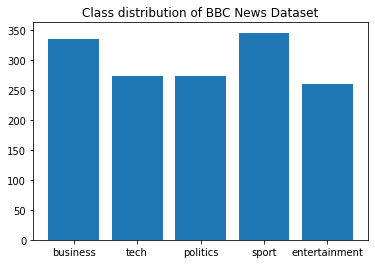

In [39]:
category, values = np.unique(df['label'].values, return_counts=True)
plt.title("Class distribution of BBC News Dataset")
plt.bar(category, values)
plt.xticks(np.arange(5), labels)
plt.show()

In [ ]:
labels = ['business', 'entertainment', 'politics', 'sport', 'tech']


In [40]:
df_business = df[df['label'] == 0]
df_entertainment = df[df['label'] == 1]
df_politics = df[df['label'] == 2]
df_sport = df[df['label'] == 3]
df_tech = df[df['label'] == 4]

# Train-valid-test split 8:1:1

df_business_train, df_business_rem = train_test_split(df_business, train_size=0.8, random_state=RANDOM_STATE)
df_entertainment_train, df_entertainment_rem = train_test_split(df_entertainment, train_size=0.8, random_state=RANDOM_STATE)
df_politics_train, df_politics_rem = train_test_split(df_politics, train_size=0.8, random_state=RANDOM_STATE)
df_sport_train, df_sport_rem = train_test_split(df_sport, train_size=0.8, random_state=RANDOM_STATE)
df_tech_train, df_tech_rem = train_test_split(df_tech, train_size=0.8, random_state=RANDOM_STATE)

df_business_valid, df_business_test = train_test_split(df_business_rem, train_size=0.5, random_state=RANDOM_STATE)
df_entertainment_valid, df_entertainment_test = train_test_split(df_entertainment_rem, train_size=0.5, random_state=RANDOM_STATE)
df_politics_valid, df_politics_test = train_test_split(df_politics_rem, train_size=0.5, random_state=RANDOM_STATE)
df_sport_valid, df_sport_test = train_test_split(df_sport_rem, train_size=0.5, random_state=RANDOM_STATE)
df_tech_valid, df_tech_test = train_test_split(df_tech_rem, train_size=0.5, random_state=RANDOM_STATE)


df_train = pd.concat([df_business_train, df_entertainment_train, df_politics_train, df_sport_train, df_tech_train], ignore_index=True, sort=False)
df_valid = pd.concat([df_business_valid, df_entertainment_valid, df_politics_valid, df_sport_valid, df_tech_valid], ignore_index=True, sort=False)
df_test = pd.concat([df_business_test, df_entertainment_test, df_politics_test, df_sport_test, df_tech_test], ignore_index=True, sort=False)

In [48]:
# Save to file
df_train.to_csv('./train.csv', index=False)
df_valid.to_csv('./valid.csv', index=False)
df_test.to_csv('./test.csv', index=False)

In [42]:
!pwd

/content


In [43]:
!ls 

drive  sample_data


In [45]:
!ls ~

In [46]:
!ls

drive  sample_data


In [47]:
!ls ./

drive  sample_data


In [49]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Model parameters
BATCH_SIZE = 16
MAX_SEQ_LEN = 200
PAD_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
UNK_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.unk_token)

In [66]:
!pip install -U  torchtext==0.8.0 --quiet

In [64]:
!pip install torchvision==0.8.0 --quiet

     |████████████████████████████████| 11.8 MB 4.7 MB/s 
     |████████████████████████████████| 776.7 MB 4.7 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 0.12.0+cu113 requires torch==1.12.0, but you have torch 1.7.0 which is incompatible.
fastai 2.7.7 requires torchvision>=0.8.2, but you have torchvision 0.8.0 which is incompatible.


In [67]:

from torchtext.legacy import data


ModuleNotFoundError: ignored

In [68]:
from torchtext.legacy.data import Field, TabularDataset, BucketIterator, Iterator


ModuleNotFoundError: ignored

In [62]:
from torchtext.legacy.data import Field, TabularDataset, BucketIterator, Iterator


ImportError: ignored

In [58]:

# Fields
label_field = data.Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.float)
text_field = data.Field(use_vocab=False, tokenize=tokenizer.encode, lower=False, include_lengths=False, batch_first=True, fix_length=MAX_SEQ_LEN, pad_token=PAD_INDEX, unk_token=UNK_INDEX)
fields = [('label', label_field), ('titlebody', text_field)]

AttributeError: ignored

In [69]:
!pip uninstall torchtext


Found existing installation: torchtext 0.8.0
Uninstalling torchtext-0.8.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/torchtext-0.8.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/torchtext/*
Proceed (y/n)? Y
  Successfully uninstalled torchtext-0.8.0


In [70]:
import torch
print(torch.__version__)

1.12.0+cu113


In [71]:
!pip uninstall torch


Found existing installation: torch 1.7.0
Uninstalling torch-1.7.0:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/lib/python3.7/dist-packages/caffe2/*
    /usr/local/lib/python3.7/dist-packages/torch-1.7.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/torch/*
Proceed (y/n)? Y
  Successfully uninstalled torch-1.7.0


In [72]:
!pip install torch==1.8.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached torch-1.8.0-cp37-cp37m-manylinux1_x86_64.whl (735.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.8.0 requires torch==1.7.0, but you have torch 1.8.0 which is incompatible.
torchaudio 0.12.0+cu113 requires torch==1.12.0, but you have torch 1.8.0 which is incompatible.
fastai 2.7.7 requires torchvision>=0.8.2, but you have torchvision 0.8.0 which is incompatible.
